In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import os
import re

In [2]:
data=pd.read_csv("data\Annotations_Metadata.csv")

In [3]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label
0,12834217_1,572066,1346,0,noHate
1,12834217_2,572066,1346,0,noHate
2,12834217_3,572066,1346,0,noHate
3,12834217_4,572066,1346,0,hate
4,12834217_5,572066,1346,0,noHate


In [4]:
# Function to read text from files based on file_id
def read_text_from_file(file_id):
    file_path=os.path.join(text_folder,f'{file_id}.txt')
    try:
        with open(file_path,'r',encoding='utf-8') as file:
            return file.read()
    except FileNotFoundError:
        return ''

In [5]:
text_folder="data\Text file"
data['actual_text']=data['file_id'].apply(lambda file_id: read_text_from_file(file_id))

In [6]:
data.head()

,file_id,user_id,subforum_id,num_contexts,label,actual_text
0,12834217_1,572066,1346,0,noHate,"As of March 13th , 2014 , the booklet had been..."
1,12834217_2,572066,1346,0,noHate,In order to help increase the booklets downloa...
2,12834217_3,572066,1346,0,noHate,( Simply copy and paste the following text int...
3,12834217_4,572066,1346,0,hate,Click below for a FREE download of a colorfull...
4,12834217_5,572066,1346,0,noHate,Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...


In [7]:
import datefinder

def extract_time(text):
    matches = datefinder.find_dates(text)
    for match in matches:
        return match.strftime('%B %d, %Y')  # Convert the match to the desired format
    return None

In [8]:
# Create a new column 'time_values' by applying the extract_time function
data['time_values'] = data['actual_text'].apply(extract_time)

In [9]:
data['time_values'] = data['time_values'].fillna(method='ffill')

C:\Users\HP\AppData\Local\Temp\ipykernel_10792\39714999.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['time_values'] = data['time_values'].fillna(method='ffill')


In [10]:
# Convert the 'time_values' column to datetime format, handling errors
data['time_values'] = pd.to_datetime(data['time_values'], errors='coerce')

In [11]:
# Set 'time_values' as the index
data.set_index('time_values', inplace=True)

In [12]:
# Resample the data to a daily frequency (adjust as needed)
daily_data = data.resample('D').count()

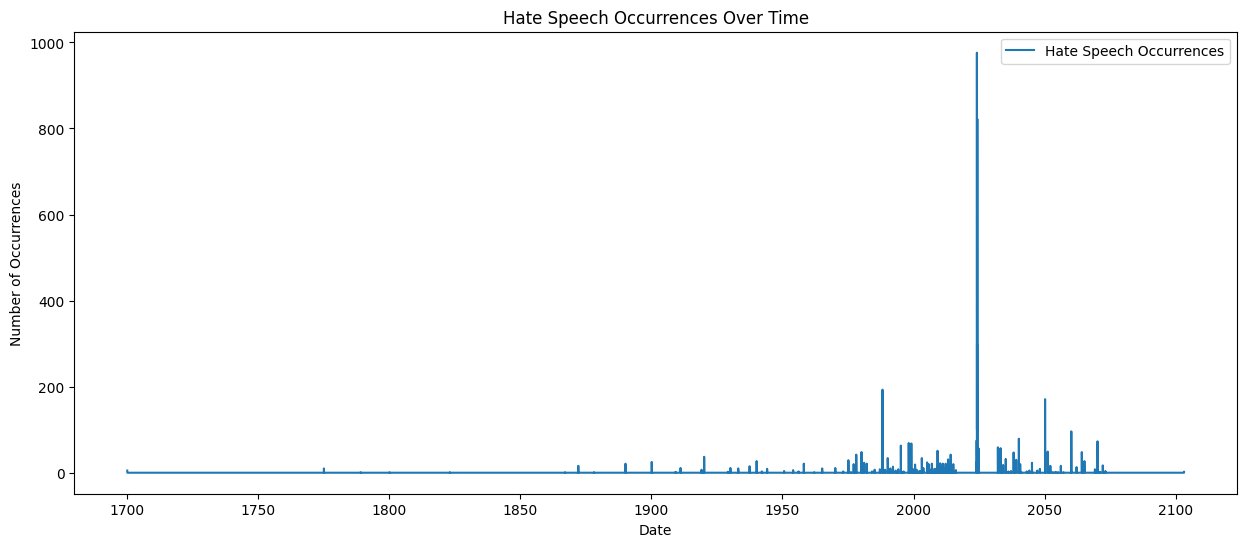

In [13]:
# Visualize hate speech occurrences over time
plt.figure(figsize=(15, 6))
plt.plot(daily_data['label'], label='Hate Speech Occurrences')
plt.title('Hate Speech Occurrences Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.show()

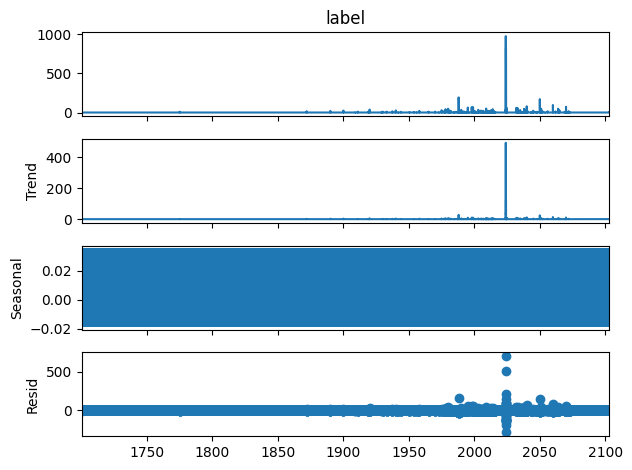

In [14]:
# Decompose the time series into trend, seasonality, and residuals
result = seasonal_decompose(daily_data['label'], model='additive', period=7)  # Adjust the period based on the data frequency
# Visualize decomposition components
result.plot()
plt.show()

In [15]:
# Augmented Dickey-Fuller Test for stationarity
adf_test = adfuller(daily_data['label'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')
print('Results:')
print('The time series is stationary.' if adf_test[1] <= 0.05 else 'The time series is not stationary.')

ADF Statistic: -36.871670796048235
p-value: 0.0
Results:
The time series is stationary.


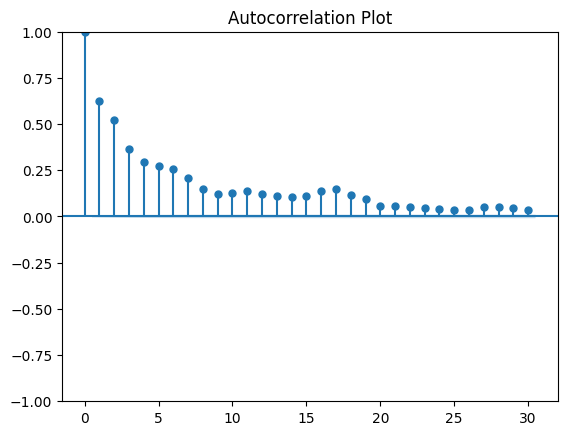

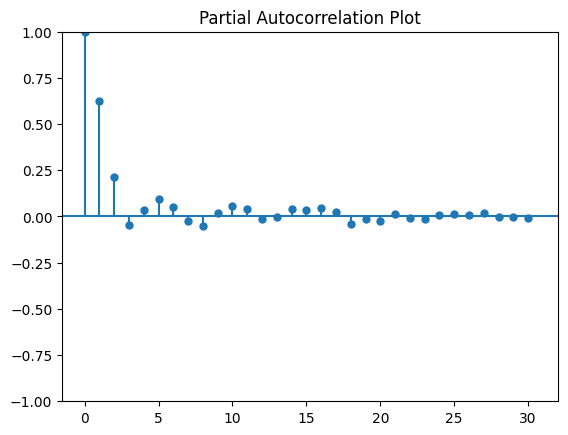

In [16]:
# Autocorrelation and Partial Autocorrelation Plots
plot_acf(daily_data['label'], lags=30)
plt.title('Autocorrelation Plot')
plt.show()

plot_pacf(daily_data['label'], lags=30)
plt.title('Partial Autocorrelation Plot')
plt.show()